In [49]:
from psaw import PushshiftAPI
import praw
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

from scipy import stats

from pymongo import MongoClient, errors
from bson.json_util import loads, dumps
from bson.objectid import ObjectId

from datetime import datetime as dt

import boto3

In [3]:
creds = {}
with open ('/opt/cap1/.cap1', 'r') as fp:
    for line in fp:
        k, v = line.replace('\n','').split('\t')
        creds[k] = v

In [4]:
reddit = praw.Reddit(client_id=creds['REDDIT_ID'], 
    client_secret=creds['REDDIT_SECRET'],
    password=creds['REDDIT_PASSWORD'], 
    username=creds['REDDIT_USERNAME'],
    user_agent='accessAPI:v0.0.1 (by /u/{})'.format(creds['REDDIT_USERNAME']))

In [5]:
client = MongoClient('localhost', 27017)
db = client['cap2']
table = db['first_and_last']

In [6]:
db.list_collection_names()

['submission', 'first_and_last', 'comment']

In [7]:
# count number of documents per collection
for coll in db.list_collection_names():
    print(f'{coll:14}: {db[coll].count_documents({}):6}')

submission    :  14523
first_and_last:    952
comment       :   6704


In [8]:
susp_usrs = pd.read_csv('data/user_activity_dataframe.csv')
susp_usrs.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
susp_usrs

,username,type,subreddit,count
0,BlackToLive,comment,politics,3
1,BlackToLive,submission,BlackLivesMatter,7
2,BlackToLive,submission,Bad_Cop_No_Donut,4
3,BlackToLive,submission,blackculture,3
4,BlackToLive,submission,blackpower,3
...,...,...,...,...
3820,rubinjer,submission,holdthemoan,1
3821,rubinjer,submission,michaelbaygifs,1
3822,rubinjer,submission,milf,1
3823,rubinjer,submission,nsfw_wtf,1


In [10]:
# suspicious users posted to 939 unique subreddits ... odd b/c there are 939 unique suspicious 
#  usernames on Reddit's transparency report
sub_unq = np.unique(susp_usrs['subreddit'])
len(sub_unq), sub_unq[:20]

(939,
 array(['100BlackMen', '2016_elections', '3DPorncraft', '3Dprinting',
        '4chan', '60fpsporn', 'A858DE45F56D9BC9', 'ANormalDayInAmerica',
        'ANormalDayInRussia', 'AccidentalRacism', 'AdvancedMicroDevices',
        'Advice', 'AdviceAnimals', 'Africa', 'AfricanAmerican', 'Agario',
        'AgeplayPenPals', 'AirForce', 'Alabama', 'Albuquerque'],
       dtype=object))

In [11]:
# TODO such an even distribution of subreddits across the alphanumeric scale...atypical?

In [12]:
# 333 of the 939 suspicious users posted a comment or submission
usr_unq = np.unique(susp_usrs['username'])
len(usr_unq), usr_unq[:20]

(333,
 array(['1488Reasons', 'Abena_Tau', 'AdoraronDoomworker',
        'AgaluneMalordred', 'AgamagelvTozshura', 'Aiden_Chuck',
        'Albert_Baldwin', 'AlsagelvBuriron', 'Amohelang',
        'AndromajurusAragrel', 'AndrorneGavinrage', 'AragelvBlackkiller',
        'AralisTugis', 'AriundisVugar', 'AriutusMokazahn',
        'AxeseekerMightwind', 'BagoreZulkihn', 'BallardredTholak',
        'BeazerneMem', 'BerskyN'], dtype=object))

In [13]:
#### there are 939 suspicious users on Reddit's list. 939...oddly specific match 
#### to the number of unique subreddits to which the 939 accounts posted
!wc -l data/suspicious_users.txt

939 data/suspicious_users.txt


In [14]:
# would like to get the very first and the very last post/comment from each user to get the time span of the data
api = PushshiftAPI()

In [64]:
limit = 1
author = 'rubinjer'
filt = ['author_created_utc', 
        'author', 
        'created_utc']

s_gen = api.search_submissions(
    author=author,
#     filter=filt,
    limit=limit)

for s in list(s_gen):
    print(s.d_)

{'author': 'rubinjer', 'author_created_utc': 1446816374, 'author_flair_css_class': None, 'author_flair_text': None, 'author_fullname': 't2_rshjh', 'brand_safe': False, 'contest_mode': False, 'created_utc': 1495121594, 'domain': 'i.imgur.com', 'full_link': 'https://www.reddit.com/r/The_Donald/comments/6bwxh9/the_man_who_upvotes_everything/', 'gilded': 0, 'id': '6bwxh9', 'is_self': False, 'is_video': False, 'locked': False, 'media_embed': {}, 'num_comments': 0, 'over_18': False, 'permalink': '/r/The_Donald/comments/6bwxh9/the_man_who_upvotes_everything/', 'retrieved_on': 1497154153, 'score': 1, 'secure_media_embed': {}, 'selftext': '', 'spoiler': False, 'stickied': False, 'subreddit': 'The_Donald', 'subreddit_id': 't5_38unr', 'suggested_sort': None, 'thumbnail': 'default', 'thumbnail_height': 87, 'thumbnail_width': 140, 'title': 'The Man who upvotes everything', 'url': 'http://i.imgur.com/ohplgTO.gifv', 'created': 1495121594.0}


In [65]:
limit = 1
author = 'rubinjer'
filt = ['author_created_utc', 
        'author', 
        'created_utc']

s_gen = api.search_submissions(
    author=author,
#     filter=filt,
    limit=limit,
    sort='asc')

for s in list(s_gen):
    print(s.d_)

{'author': 'rubinjer', 'author_created_utc': 1446816374, 'author_flair_css_class': None, 'author_flair_text': None, 'author_fullname': 't2_rshjh', 'created_utc': 1447341566, 'domain': 'i.imgur.com', 'full_link': 'https://www.reddit.com/r/gifs/comments/3sji6h/hes_a_genius/', 'gilded': 0, 'id': '3sji6h', 'is_self': False, 'locked': False, 'media_embed': {}, 'num_comments': 3, 'over_18': False, 'permalink': '/r/gifs/comments/3sji6h/hes_a_genius/', 'post_hint': 'image', 'preview': {'images': [{'id': 'plZzrzVBA2PMJlDd-dKGhMHB79YSsa7QAeqnf-21FGM', 'resolutions': [{'height': 74, 'url': 'https://i.redditmedia.com/6kheZwuhyanJHQ3VEsiIlmHXi_mBmH1lMl7pTYlsvsU.jpg?fit=crop&amp;crop=faces%2Centropy&amp;arh=2&amp;w=108&amp;s=0863ca4f809452ce9b0c7d5ebf1a18f2', 'width': 108}, {'height': 149, 'url': 'https://i.redditmedia.com/6kheZwuhyanJHQ3VEsiIlmHXi_mBmH1lMl7pTYlsvsU.jpg?fit=crop&amp;crop=faces%2Centropy&amp;arh=2&amp;w=216&amp;s=a134828058caca4008ef794a4e487725', 'width': 216}], 'source': {'height':

In [15]:
def first_last(**kwargs):
    '''
    **kwargs : api search parameters, e.g.
        {'author': 'rubinjer',
        'filter': ['id'],
        'limit': 1,
        'sort': 'asc'}
    '''
    sort_types = ('desc', 'asc')
    kwargs['limit'] = 1
    search_types = (api.search_submissions, api.search_comments)
    for search_type in search_types:
        for sort_type in sort_types:
            kwargs['sort'] = sort_type
            gen = search_type(**kwargs)
            for g in list(gen):
                print(g.d_)
            print()
    
first_last(author='DeusXYX')

{'author': 'deusXYX', 'author_flair_css_class': None, 'author_flair_text': None, 'brand_safe': True, 'can_mod_post': False, 'contest_mode': False, 'created_utc': 1510172324, 'domain': 'telegra.ph', 'full_link': 'https://www.reddit.com/r/MURICA/comments/7bo2xb/our_democracy_has_been_hacked_jenna_abrams_who/', 'id': '7bo2xb', 'is_crosspostable': True, 'is_reddit_media_domain': False, 'is_self': False, 'is_video': False, 'locked': False, 'num_comments': 0, 'num_crossposts': 0, 'over_18': False, 'parent_whitelist_status': 'all_ads', 'permalink': '/r/MURICA/comments/7bo2xb/our_democracy_has_been_hacked_jenna_abrams_who/', 'pinned': False, 'retrieved_on': 1510254994, 'score': 4, 'selftext': '', 'spoiler': False, 'stickied': False, 'subreddit': 'MURICA', 'subreddit_id': 't5_2u28p', 'thumbnail': 'default', 'title': 'Our Democracy Has Been Hacked: Jenna Abrams, who has 70,000 followers, does not exist, was created by St. Petersburg troll farm', 'url': 'http://telegra.ph/Our-Democracy-Has-Been-H

In [ ]:
from psaw import PushshiftAPI
import numpy as np
import pandas as pd
from pymongo import MongoClient

api = PushshiftAPI()

client = MongoClient('localhost', 27017)
db = client['cap2']
table = db['first_and_last']

def first_last(**kwargs):
    sort_types = ('desc', 'asc')
    kwargs['limit'] = 1
    search_types = (api.search_submissions, api.search_comments)
    for search_type in search_types:
        for sort_type in sort_types:
            kwargs['sort'] = sort_type
            gen = search_type(**kwargs)
            for g in list(gen):
                print(g.d_)
                table.insert_one(g.d_)

In [ ]:
susp_usrs = pd.read_csv('data/user_activity_dataframe.csv')
susp_usrs.drop('Unnamed: 0', axis=1, inplace=True)
    
# first_last(author='DeusXYX')
for usr in np.unique(susp_usrs['username']):
    print(f'Author: {usr}')
    first_last(author=usr)
    print()

In [66]:
db.list_collection_names()

['first_and_last']

In [67]:
table.count_documents({})

952

## we have the first and last comments and submissions for each user. How many users commented? submitted? Over what time frame?

In [18]:
submissions = []
comments = []
for doc in table.find({}, {'_id': 0}):
    if 'title' in doc:
        submissions.append(doc)
    elif 'body' in doc:
        comments.append(doc)

In [19]:
print('Document counts ...')
print(f'submissions: {len(submissions)}')
print(f'comments: {len(comments)}')
print(f'total: {len(submissions) + len(comments)}')

Document counts ...
submissions: 658
comments: 294
total: 952


#### I didn't initially store whether a document was a submission or comment, but we use the 'title' and 'body' keys to distinguish them. All documents accounted for, with 658 submissions and 294 comments

## visualize the timestamps of the first and last contributions

In [79]:
subs_df = pd.DataFrame.from_dict(submissions)
comms_df = pd.DataFrame.from_dict(comments)

In [21]:
comms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author                    294 non-null    object 
 1   author_created_utc        285 non-null    float64
 2   author_flair_css_class    8 non-null      object 
 3   author_flair_text         8 non-null      object 
 4   author_fullname           252 non-null    object 
 5   body                      294 non-null    object 
 6   controversiality          252 non-null    float64
 7   created_utc               294 non-null    int64  
 8   distinguished             0 non-null      float64
 9   gilded                    252 non-null    float64
 10  id                        294 non-null    object 
 11  link_id                   294 non-null    object 
 12  nest_level                248 non-null    float64
 13  parent_id                 294 non-null    object 
 14  reply_dela

In [22]:
subs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   author                         658 non-null    object 
 1   author_created_utc             592 non-null    float64
 2   author_flair_css_class         13 non-null     object 
 3   author_flair_text              3 non-null      object 
 4   author_fullname                592 non-null    object 
 5   contest_mode                   241 non-null    object 
 6   created_utc                    658 non-null    int64  
 7   domain                         658 non-null    object 
 8   full_link                      658 non-null    object 
 9   gilded                         617 non-null    float64
 10  id                             658 non-null    object 
 11  is_self                        658 non-null    bool   
 12  locked                         471 non-null    obj

In [80]:
# set the index to datetime using the timestamp in 'created_utc'
comms_df.index = [dt.fromtimestamp(x) for x in comms_df['created_utc']]
subs_df.index = [dt.fromtimestamp(x) for x in subs_df['created_utc']]

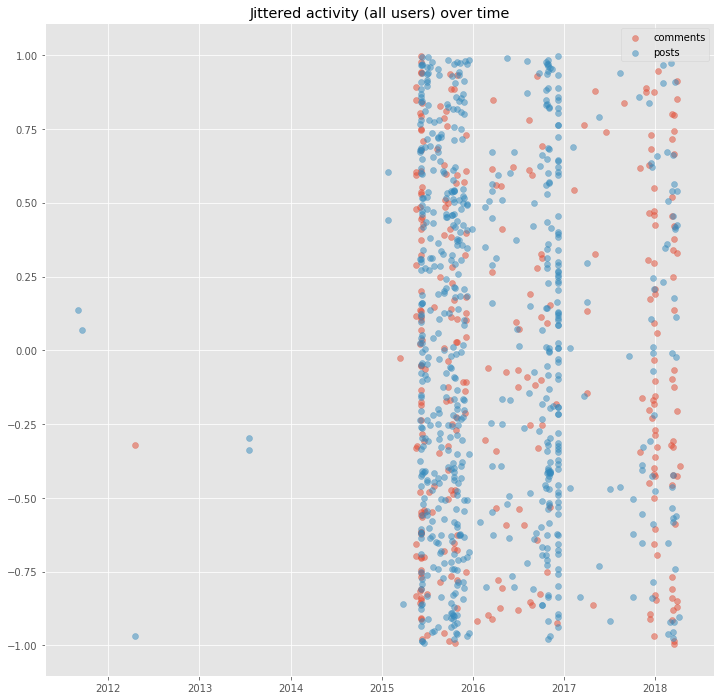

In [81]:
# show me the data!
fig, ax = plt.subplots(1, figsize=(12, 12))
dat_type = ['comments', 'posts']
for i, dat in enumerate([comms_df, subs_df]):
    range_dat = dat
    jitter = stats.uniform(-1, 2).rvs(len(range_dat))
    ax.scatter(range_dat.index, jitter, label=dat_type[i], alpha=0.5)
    ax.set_title('Jittered activity (all users) over time')
ax.legend();


#### just look at the activity leading up to the election after the action starts in 2015

In [325]:
date_start='2015-05'
date_end='2017-01'
len(comms_df[date_start:date_end])

201

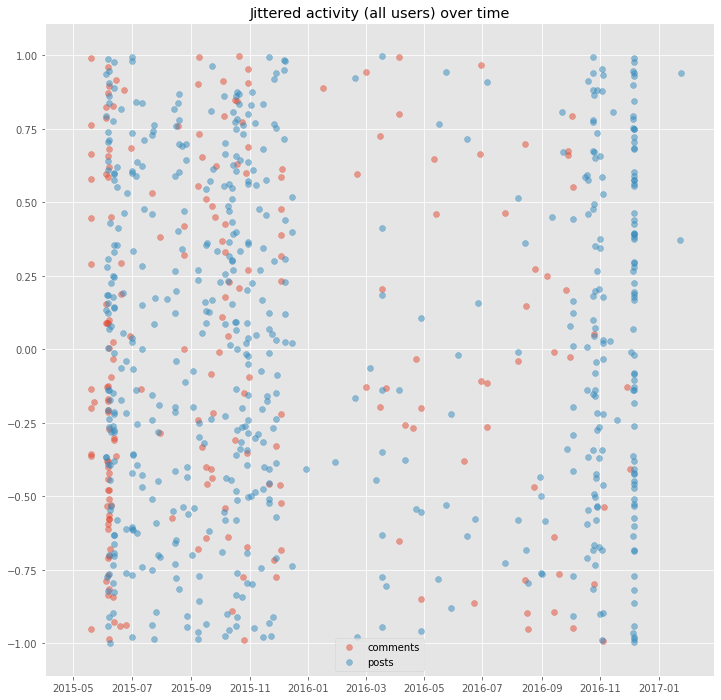

In [83]:
# show me the data!
fig, ax = plt.subplots(1, figsize=(12, 12))
dat_type = ['comments', 'posts']
for i, dat in enumerate([comms_df, subs_df]):
    range_dat = dat[date_start:date_end]
    jitter = stats.uniform(-1, 2).rvs(len(range_dat))
    ax.scatter(range_dat.index, jitter, label=dat_type[i], alpha=0.5)
    ax.set_title('Jittered activity (all users) over time')
ax.legend();

#### what do these spikes of activity look like when resampled by day/hour?

In [84]:
subs_hourly = subs_df['created_utc'].resample('H').count()
comms_hourly = comms_df['created_utc'].resample('H').count()

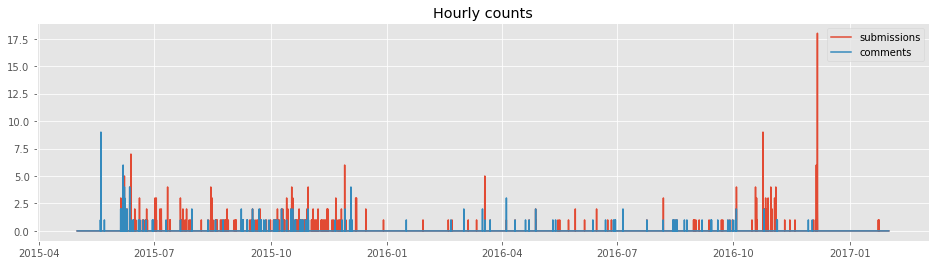

In [85]:
fig, ax = plt.subplots(1, figsize=(16, 4))

ax.plot(subs_hourly[date_start:date_end], label='submissions')
ax.plot(comms_hourly[date_start:date_end], label='comments')
ax.set_title("Hourly counts")
ax.legend()

In [72]:
subs_daily = subs_df['created_utc'].resample('D').count()
comms_daily = comms_df['created_utc'].resample('D').count()

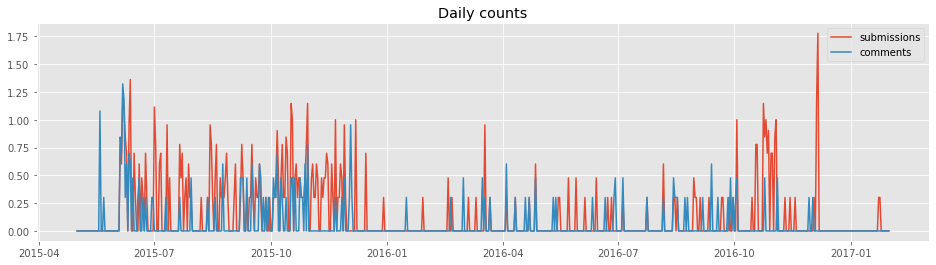

In [329]:
fig, ax = plt.subplots(1, figsize=(16, 4))

ax.plot(np.log10(subs_daily[date_start:date_end]+1), label='submissions', scaley='log')
ax.plot(np.log10(comms_daily[date_start:date_end]+1), label='comments', scaley='log')
ax.set_title("Daily counts")
ax.legend()

#### so that spike, which users and subreddits is that?

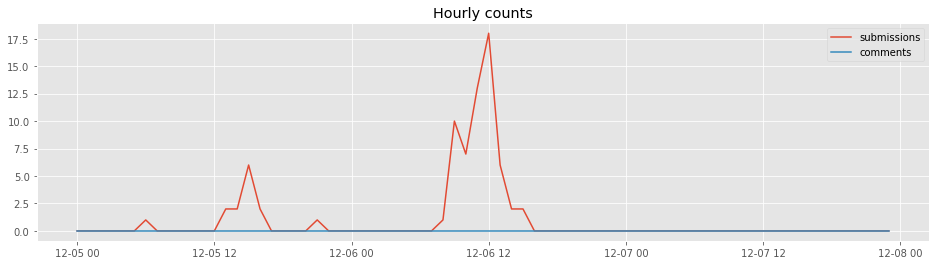

In [88]:
fig, ax = plt.subplots(1, figsize=(16, 4))

date_start, date_end = '2016-12-05', '2016-12-07'
ax.plot(subs_hourly[date_start:date_end], label='submissions')
ax.plot(comms_hourly[date_start:date_end], label='comments')
ax.set_title("Hourly counts")
ax.legend()

In [176]:
def timespan_activity_user_subreddit(df,
                                     fields=['author', 'subreddit'],
                                     resample_by='D',
                                     date_start=None,
                                     date_end=None,
                                     title=None):
    '''
    plot total activity, then break out by author and subreddit
    '''
    range_df = df[date_start:date_end]
    resamp_df = range_df.resample(resample_by).count()
    fig, axs = plt.subplots(3, 1, figsize=(16, 48))
    axs[0].plot(resamp_df['created_utc'].fillna(0))
    axs[0].set_title(title)
    for i, f in enumerate(fields):
        plot_strip_counts(range_df, f, axs[i+1], 
                          title=f'activity by {f}',
                          date_start=date_start,
                          date_end=date_end)

In [177]:
def plot_strip_counts(df, field, ax, title=None, date_start=None, date_end=None):
    for i, val in enumerate(np.unique(df[field])):
        filt_series = df[df[field] == val][date_start:date_end][field]
        ax.scatter(filt_series.index, filt_series, color='blue', alpha=0.25)
        ax.set_ylabel(field)
        ax.set_title(title)

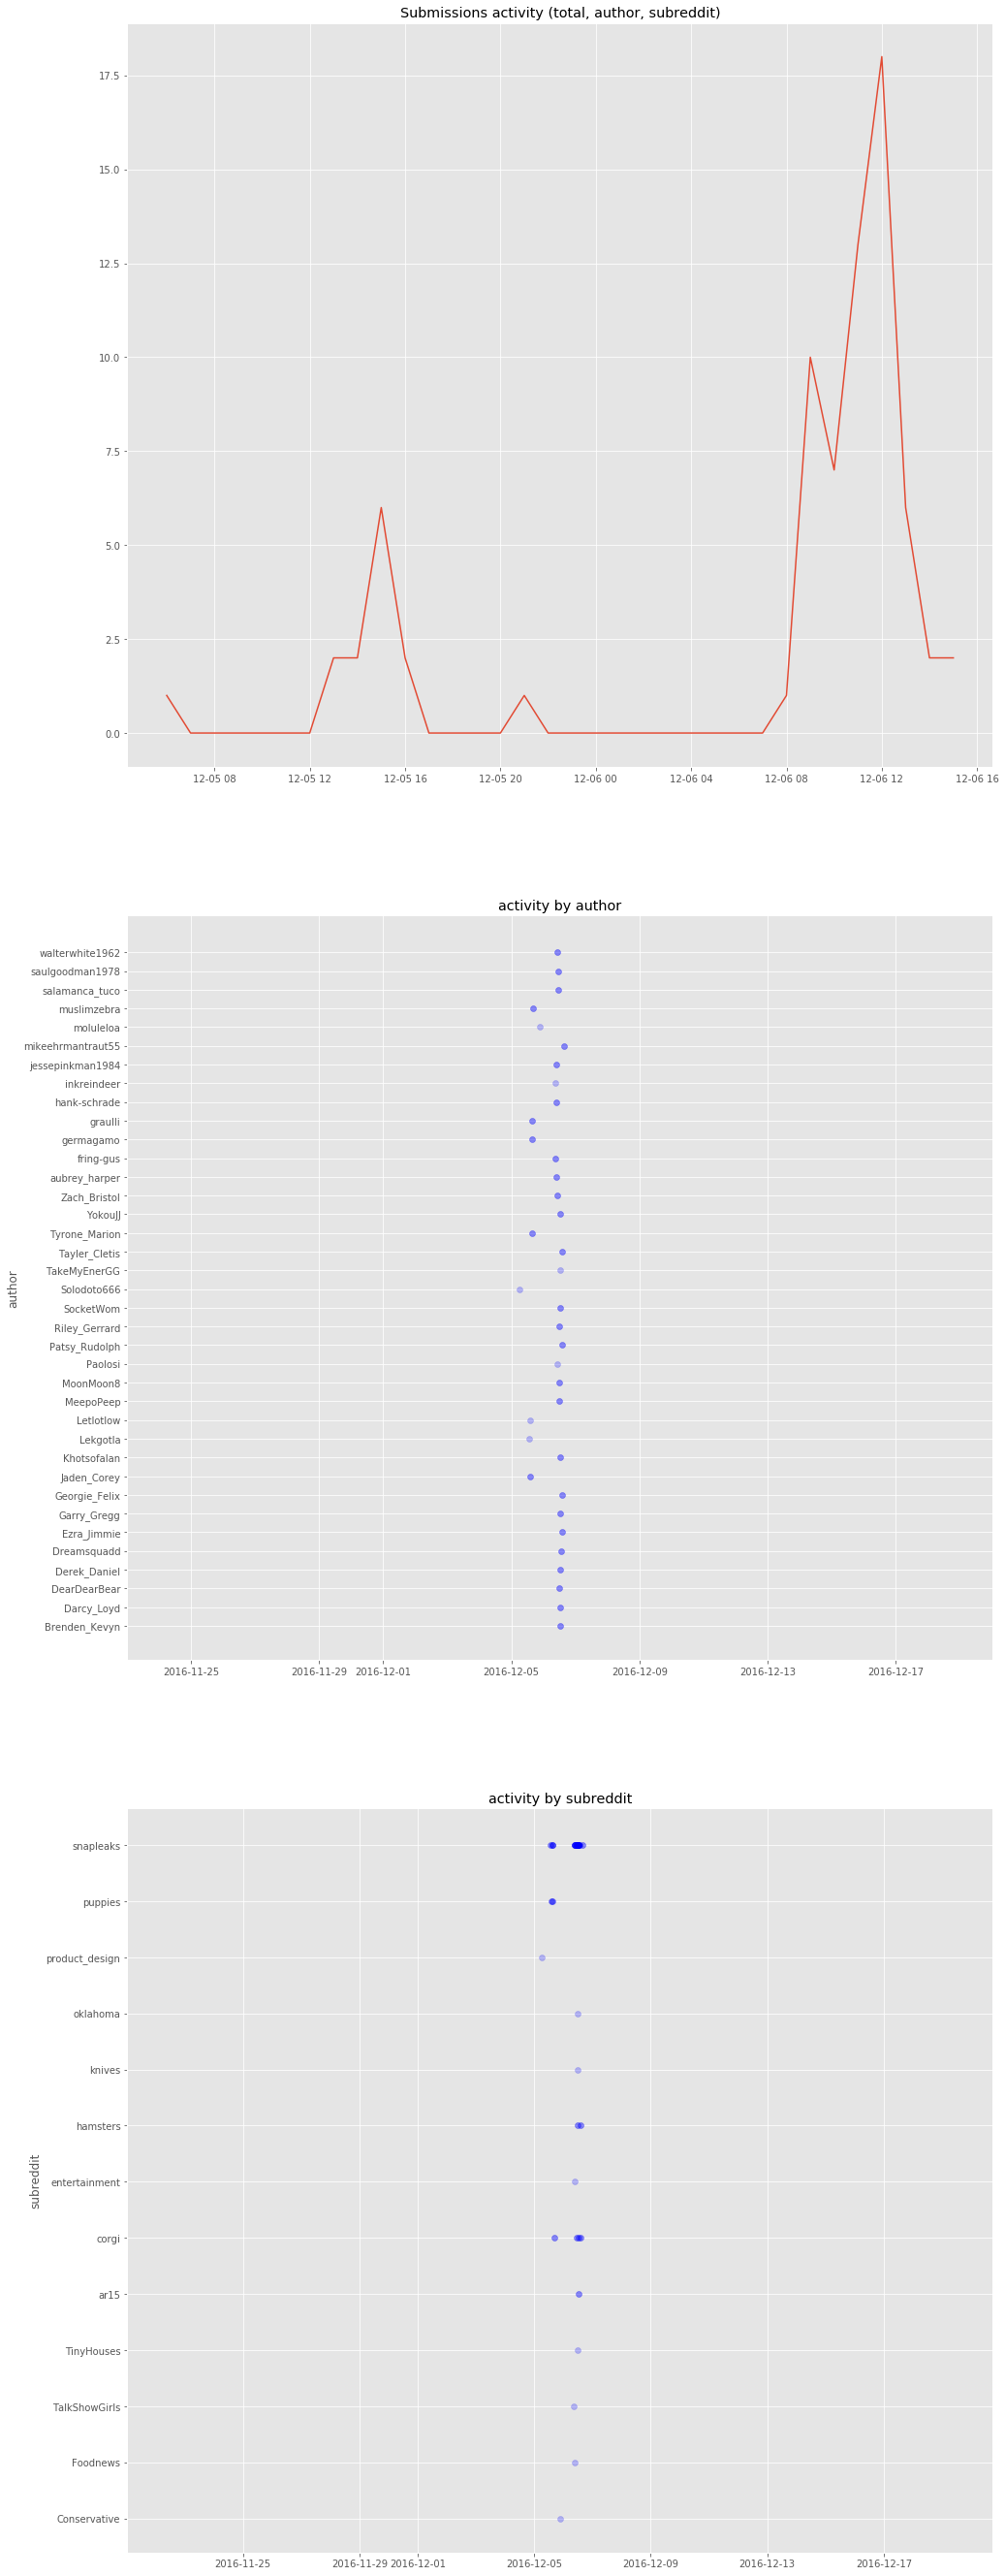

In [182]:
timespan_activity_user_subreddit(subs_df, 
                                 resample_by='H', 
#                                  date_start='2015-05-15', 
#                                  date_end='2016-01', # broad range
                                 date_start='2016-12-05',
                                 date_end='2016-12-07',
                                 title='Submissions activity (total, author, subreddit)')

#### when did activity happen in the most controversial subreddits?

#### when were the users created?

In [237]:
def plot_activity_with_jitter(ax, series, title=None, label=None):
    jitter = stats.uniform(-1, 2).rvs(len(series))
    x = [dt.fromtimestamp(x) for x in series]
    ax.scatter(x, jitter, alpha=0.5, label=label)
    ax.set_title(title)

In [238]:
# series = comms_df['2015-05':'2017-01']['author_created_utc'].dropna()
# series = comms_df['2015':'2017']['author_created_utc'].dropna()
comms = comms_df['author_created_utc'].dropna()
subs = subs_df['author_created_utc'].dropna()
len(comms), len(subs)

(285, 592)

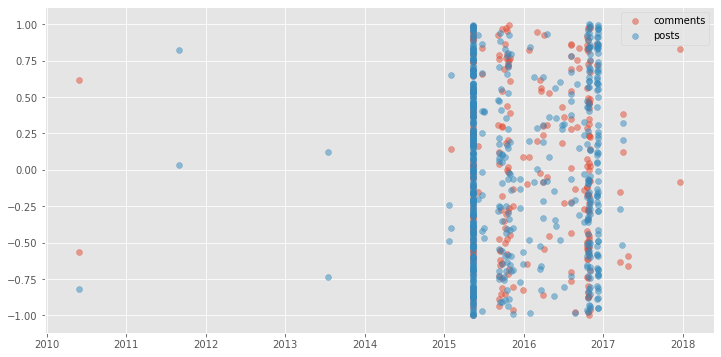

In [239]:
date_s, date_e = '2015-05', '2017-01'
fig, ax = plt.subplots(1, figsize=(12, 6))
titles = ['comments', 'posts']
for i, s in enumerate([comms, subs]):
    plot_activity_with_jitter(ax, s, label=titles[i])
ax.legend()

#### what is the pattern of author created vs. activity?

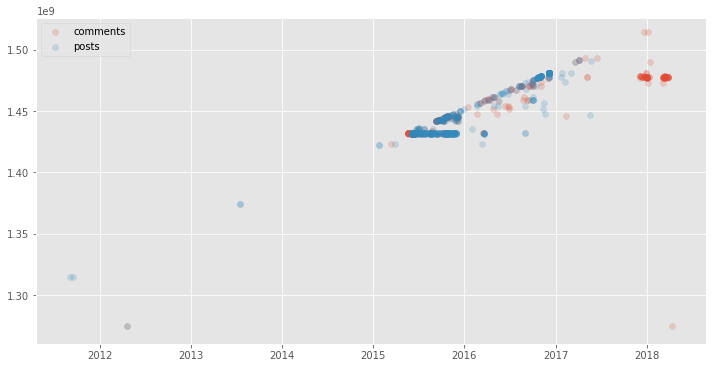

In [293]:
# start_d, end_d = '2015-05', '2017-01'
start_d, end_d = None, None
activity_types = ['comments', 'posts']
this_df = comms_df[start_d:end_d]
other_df = subs_df[start_d:end_d]
fig, ax = plt.subplots(1, figsize=(12, 6))
for i, mydf in enumerate([comms_df[start_d:end_d], subs_df[start_d:end_d]]):
    ax.scatter(mydf.index, 
               mydf['author_created_utc'], 
               label=activity_types[i], alpha=0.1)
ax.legend()
    
#     ax.scatter(this_df.index, this_df['author_created_utc'], label='comments', alpha=0.2)
# ax.scatter()

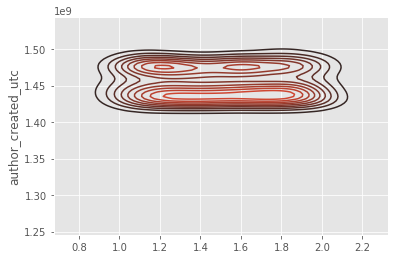

In [316]:
#fig, ax = plt.subplots(1, figsize=(12, 12))
# 2d density is cool, with lines but no shading
sns.kdeplot(stats.uniform(1, 1).rvs(len(comms)), data2=comms) 

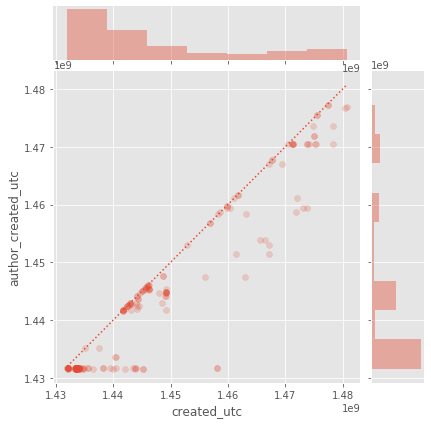

In [317]:
# lines and shading 2d density
range_df = comms_df['2015-05':'2017-01']
axs = sns.jointplot("created_utc", "author_created_utc", 
                    data=range_df, 
                    kind='scatter', 
                    alpha=0.2)
# add the x=y line for comments made immediately following acount creation
x = np.linspace(np.min(range_df['created_utc']), np.max(range_df['created_utc']), 250)
axs.ax_joint.plot(x, x, ':')

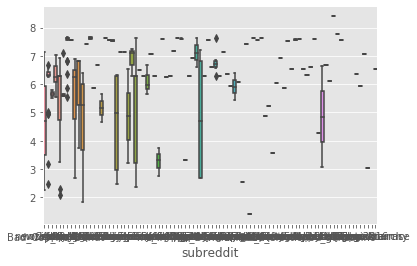

In [318]:
# boxplots are cool too
y=np.log10(comms_df['created_utc'] - comms_df['author_created_utc'])
sns.boxplot(x=comms_df['subreddit'], y=y, orient='v');
# sns.boxplot()

In [305]:
vars(ax)

{'fig': <Figure size 432x432 with 3 Axes>,
 'ax_joint': <matplotlib.axes._subplots.AxesSubplot at 0x7f6be764a760>,
 'ax_marg_x': <matplotlib.axes._subplots.AxesSubplot at 0x7f6be7662310>,
 'ax_marg_y': <matplotlib.axes._subplots.AxesSubplot at 0x7f6be7608a00>,
 'x': array([1467090533, 1452931455, 1433689149, 1432302656, 1436517936,
        1434719294, 1434028967, 1434028967, 1434030921, 1434029162,
        1432065326, 1432065326, 1434106591, 1434100000, 1520865600,
        1512315047, 1467741509, 1467740272, 1448741747, 1448741747,
        1438275911, 1438275911, 1433688629, 1433414189, 1458136919,
        1458136919, 1432065417, 1432065417, 1520693551, 1514672017,
        1478244280, 1471168253, 1475252357, 1470495352, 1433756864,
        1433663529, 1521206419, 1514497013, 1433682101, 1433682101,
        1432065486, 1432065486, 1433670117, 1433670117, 1521121811,
        1513034305, 1520940494, 1513687737, 1434099349, 1433659904,
        1433676226, 1433668152, 1433682325, 1433421706

#### cool, so how does this break down by user? i.e., how coordinated is the activity across users?
#### look at resampled time series for every combination of user, subreddit, and type of activity

In [ ]:
# show me the data!
fig, ax = plt.subplots(1, figsize=(12, 12))
dat_type = ['comments', 'posts']
for i, dat in enumerate([comms_df, subs_df]):
    range_dat = dat[date_start:date_end]
    jitter = stats.uniform(-1, 2).rvs(len(range_dat))
    ax.scatter(range_dat.index, jitter, label=dat_type[i], alpha=0.5)
    ax.set_title('Jittered activity (all users) over time')
ax.legend();

In [51]:
def plot_strip(df, field, ax, title=None, date_start=None, date_end=None):
    for i, val in enumerate(np.unique(df[field])):
        filt_series = df[df[field] == val][date_start:date_end][field]
        ax.scatter(filt_series.index, filt_series, color='blue', alpha=0.25)
        ax.set_ylabel(field)
        ax.set_title(title)
        ax.set_xlim(left=date_start, right=date_end)

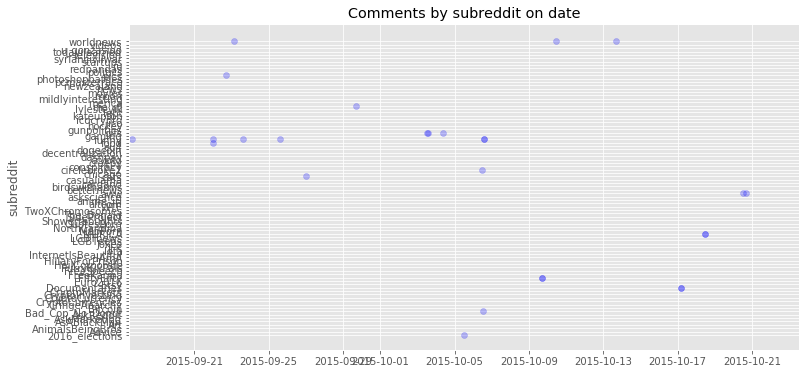

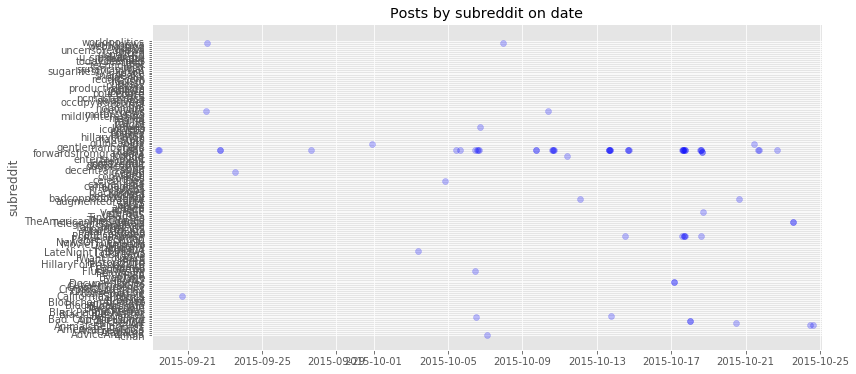

In [78]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plot_strip(comms_df, 'subreddit', ax, title='Comments by subreddit on date')
fig, ax2 = plt.subplots(1, figsize=(12, 6))
plot_strip(subs_df, 'subreddit', ax2, title='Posts by subreddit on date')

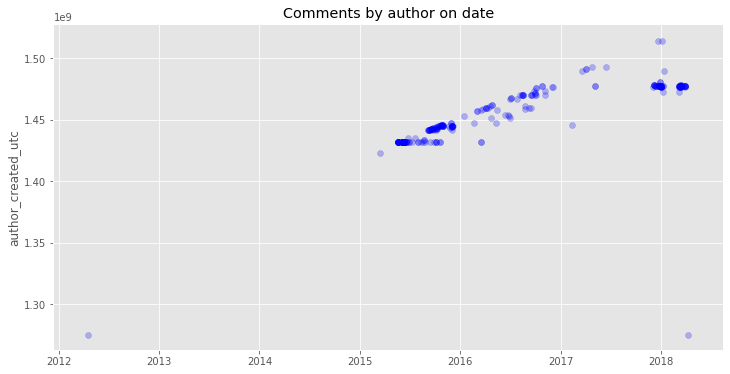

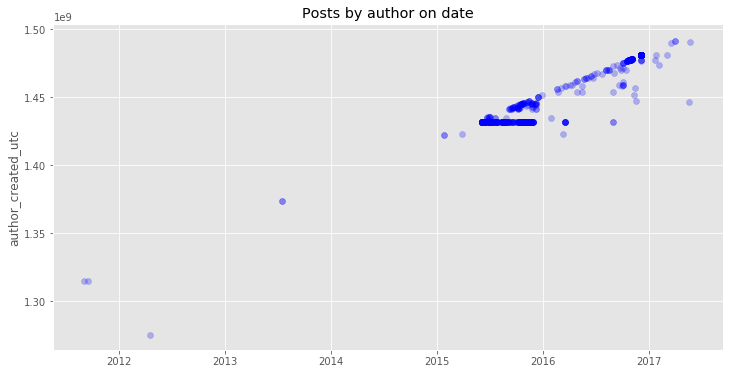

In [230]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plot_strip(comms_df, 'author_created_utc', ax, title='Comments by author on date')
fig, ax2 = plt.subplots(1, figsize=(12, 6))
plot_strip(subs_df, 'author_created_utc', ax2, title='Posts by author on date')

In [210]:
comms_df['create_active_diff'] = comms_df['created_utc'] - comms_df['author_created_utc']
subs_df['create_active_diff'] = subs_df['created_utc'] - subs_df['author_created_utc']

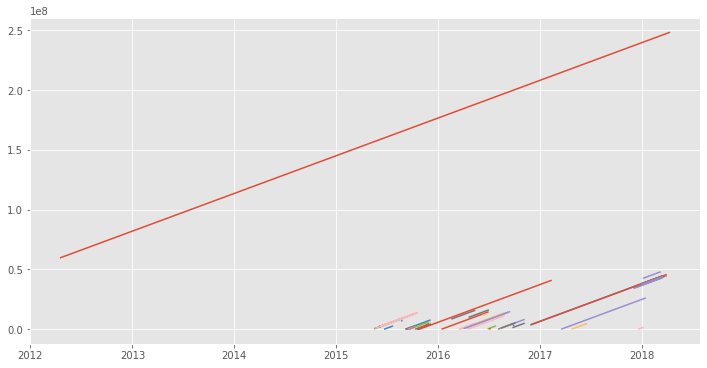

In [232]:
fig, ax = plt.subplots(1, figsize=(12, 6))
for i, val in enumerate(np.unique(comms_df['author'])):
    plot_vals = comms_df[comms_df['author']==val]['create_active_diff']
    ax.plot(plot_vals.index, plot_vals)

In [202]:
filt_comms_df = comms_df[comms_df['subreddit'] == 'The_Donald']
filt_subs_df = subs_df[subs_df['subreddit'] == 'The_Donald']

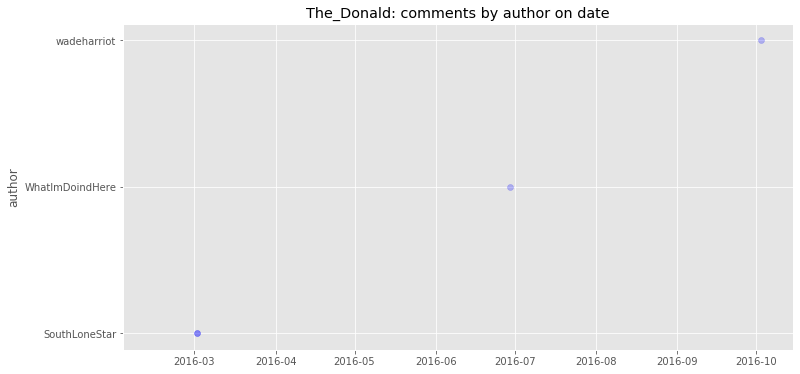

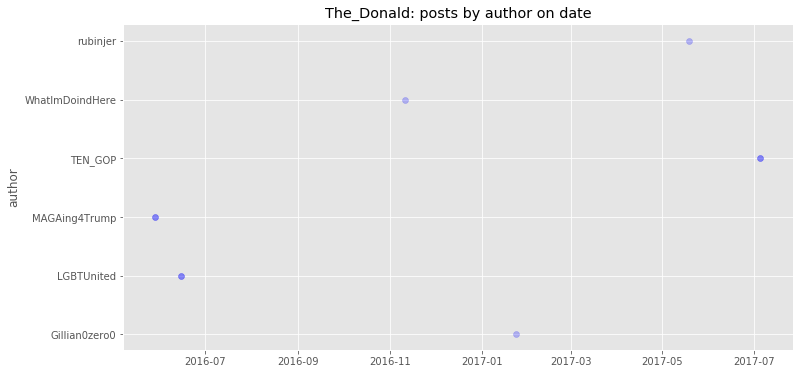

In [203]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plot_strip(filt_comms_df, 'author', ax, title='The_Donald: comments by author on date')
fig, ax2 = plt.subplots(1, figsize=(12, 6))
plot_strip(filt_subs_df, 'author', ax2, title='The_Donald: posts by author on date')

#### let's zoom in on 2015

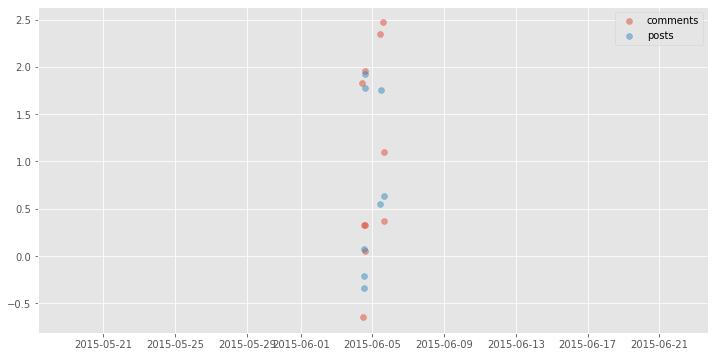

In [171]:
fig, ax = plt.subplots(1, figsize=(12, 6))
date_begin = '2000-01-01'
date_end = '2020-01-01'
dat_type = ['comments', 'posts']
for i, dat in enumerate([comms_df, subs_df]):
#     range_dat = dat.loc[date_begin:date_end]
    range_dat = dat['2015-06-04':'2015-06-05']
    jitter = stats.norm(1, 1).rvs(len(range_dat))
    ax.scatter(range_dat.index, jitter, label=dat_type[i], alpha=0.5)
ax.legend()

In [38]:
# we'll use the created_utc field for our timestamp
d['created_utc']

1467090533

In [44]:
dt.fromtimestamp(1467090533)

datetime.datetime(2016, 6, 28, 5, 8, 53)

In [122]:
dt(2015, 7, 1).timestamp()

1435708800.0

## get the data
Recall we only have first and last documents ...
* submissions: 658
* comments: 294
* total: 952

We need all the comments and submissions (`action_type`) by every suspicious user (`author`)...

In [ ]:
# table = db['comments']

# c_gen = api.search_comments(
#                 after=s,
#                 before=e,
#                 subreddit=subreddit,
#                 limit=limit)

# p_gen = api.search_submissions(
#                 after=s,
#                 before=e,
#                 subreddit=subreddit,
#                 limit=limit)

# c_gen = api.search_comments(
#                 after=s,
#                 before=e,
#                 subreddit=subreddit)

# for c in c_gen:
#     table.insert_one(c.d_)

In [ ]:
from psaw import PushshiftAPI
from pymongo import MongoClient, errors
import pandas as pd
import numpy as np

api = PushshiftAPI()

client = MongoClient('localhost', 27017)
db = client['cap2']

In [7]:
# get the user activity
usr_actvty = pd.read_csv('data/user_activity_dataframe.csv')
usr_actvty.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
usr_actvty.groupby('type')['count'].sum()

type
comment        6685
submission    13838
Name: count, dtype: int64

In [445]:
activity_types = ['comment', 'submission']
for i, api_search in enumerate([api.search_comments, api.search_submissions]):
    typ = activity_types[i]
    table = db[typ]
    # drop the collection if it exists already
    table.drop()
    # create it, enforcing unique key ids
    table.create_index('id', unique=True)
    users = np.unique(usr_actvty[usr_actvty['type'] == typ]['username'])
    for usr in users:
        gen = api_search(author=usr)
        for a in gen:
            table.insert_one(a.d_)

In [36]:
# db['comment'].find_one({})
db['comment'].count_documents({}), db['submission'].count_documents({})

(6593, 14523)

In [57]:
# I updated the above code to do this the first time, but the data didn't went through
# the following process because the unique index didn't exist the first time around

# focus on comments for now
# add a unique index onto the tables by column 'id'

# dump the table to an array of json strings
doc_arr = []
for doc in db.comment.find({}):
    json_str = dumps(doc)
    doc_arr.append(json_str)

# drop the collection
db['comment'].drop()

# create it again, this time enforcing unique key ids
db['comment'].create_index('id', unique=True)

# load the json strings back into the new table
for doc in doc_arr:
    json_str = loads(doc)
    try:
        db['comment'].insert_one(json_str)
    except errors.DuplicateKeyError:
        continue


#### there were 15 duplicates in the doc_arr

In [56]:
example_comment = db['comment'].find_one({'author': '1488reasons'})
example_comment

{'_id': ObjectId('5eb97402bffc5f1186ebbeae'),
 'author': '1488reasons',
 'author_created_utc': 1452931267,
 'author_flair_css_class': 'nzfirst',
 'author_flair_text': '',
 'author_fullname': 't2_tu7sn',
 'body': "yeah and he wants to consider it by limiting who is in the community, and he wasn't particularly nice about that by modern feel-good standards that want to keep paying mo' money for dem programs.",
 'controversiality': 0,
 'created_utc': 1467090533,
 'distinguished': None,
 'gilded': 0,
 'id': 'd4qvapg',
 'link_id': 't3_4q6zhk',
 'nest_level': 7,
 'parent_id': 't1_d4quv2y',
 'reply_delay': 968,
 'retrieved_on': 1469344733,
 'score': -7,
 'stickied': False,
 'subreddit': 'newzealand',
 'subreddit_id': 't5_2qhma',
 'created': 1467090533.0}

Given a comment with `id`, get all the other comments in the thread as background

In [18]:
my_posts_with_suspicious_comments = list(db['comment'].find().distinct('link_id'))), db['comment'].count_documents({})

(5206, 6704)

In [ ]:
# oh this is not good. found 0 comments in many many threads from psaw
# check praw...
for submission_id in db['comment'].find().distinct('link_id'):
    query_id = submission_id.split('_')[1]
    gen = api.search_comments(link_id=query_id, limit=10)
    print(f'found {len(list(gen))} comments in thread {query_id}')
    #     for comment in gen:
#         try:
#             db['comment'].insert_one(comment.d_)
#         except errors.DuplicateKeyError:
#             continue
#     break

found 0 comments in thread 100ikq
found 0 comments in thread 107avx
found 0 comments in thread 10lzf1
found 0 comments in thread 10o4sg
found 0 comments in thread 118yco
found 0 comments in thread 11yi1c
found 4 comments in thread 12woty
found 0 comments in thread 13xkkf
found 0 comments in thread 13xomq
found 0 comments in thread 13ygh9
found 0 comments in thread 13zh7m
found 0 comments in thread 13zivt
found 0 comments in thread 13zp0v
found 0 comments in thread 140n7n
found 0 comments in thread 149tvn
found 0 comments in thread 14a2t3
found 0 comments in thread 14a405
found 0 comments in thread 14akis
found 0 comments in thread 14ausi
found 0 comments in thread 14b0j1
found 0 comments in thread 14dbw9
found 0 comments in thread 14erq6
found 0 comments in thread 14g3yd
found 0 comments in thread 14gyd9
found 0 comments in thread 14i30a
found 0 comments in thread 14jia5
found 0 comments in thread 14l2sv
found 0 comments in thread 14mq26
found 0 comments in thread 14nosf
found 0 commen

found 0 comments in thread 1zfj6x
found 0 comments in thread 1zg5gl
found 0 comments in thread 1zgg7m
found 0 comments in thread 1zh9r8
found 0 comments in thread 1zidku
found 0 comments in thread 1zinku
found 0 comments in thread 1zmvxw
found 0 comments in thread 1znpz5
found 0 comments in thread 1znzn2
found 0 comments in thread 1zpe4j
found 0 comments in thread 1zpj0a
found 0 comments in thread 1zs1v4
found 0 comments in thread 1zskf0
found 0 comments in thread 1zst6o
found 0 comments in thread 1zsvn0
found 0 comments in thread 1zuw2i
found 0 comments in thread 1zvz60
found 0 comments in thread 1zwbug
found 0 comments in thread 1zz56o
found 0 comments in thread 201gjl
found 0 comments in thread 202b0y
found 0 comments in thread 205a46
found 0 comments in thread 2080o6
found 0 comments in thread 2082mu
found 0 comments in thread 208c6r
found 0 comments in thread 2091l1
found 0 comments in thread 20b74q
found 0 comments in thread 20b8b5
found 0 comments in thread 20bifd
found 0 commen

found 0 comments in thread 2jbbs2
found 0 comments in thread 2ji50c
found 0 comments in thread 2juj1h
found 0 comments in thread 2jvg30
found 0 comments in thread 2ko11e
found 0 comments in thread 2kphqu
found 0 comments in thread 2l21t1
found 0 comments in thread 2lb508
found 0 comments in thread 2lb7to
found 0 comments in thread 2lbz4f
found 0 comments in thread 2ljnjs
found 0 comments in thread 2lkl0a
found 0 comments in thread 2lvsa9
found 0 comments in thread 2lw0rv
found 0 comments in thread 2m1nbn
found 0 comments in thread 2m5xlr
found 0 comments in thread 2m6jfb
found 0 comments in thread 2m7imd
found 0 comments in thread 2m7zix
found 0 comments in thread 2m87sq
found 0 comments in thread 2m8h11
found 0 comments in thread 2mgwp2
found 0 comments in thread 2mjam0
found 0 comments in thread 2nbslo
found 0 comments in thread 2om15t
found 0 comments in thread 2om7m8
found 0 comments in thread 2owolq
found 0 comments in thread 2oxuok
found 0 comments in thread 2oyo5u
found 0 commen

found 0 comments in thread 38vaqg
found 0 comments in thread 38vezh
found 0 comments in thread 38vj08
found 0 comments in thread 38vmqw
found 0 comments in thread 38vt0w
found 0 comments in thread 38vtsv
found 0 comments in thread 38vwq2
found 0 comments in thread 38w0zb
found 0 comments in thread 38w2nx
found 0 comments in thread 38w2y2
found 0 comments in thread 38w3ev
found 0 comments in thread 38w49h
found 0 comments in thread 38w5im
found 0 comments in thread 38w7qa
found 0 comments in thread 38wg0u
found 0 comments in thread 38wgvh
found 0 comments in thread 38wh08
found 0 comments in thread 38whbt
found 0 comments in thread 38whvh
found 0 comments in thread 38wjmy
found 0 comments in thread 38wjzu
found 0 comments in thread 38wmws
found 0 comments in thread 38wn6b
found 0 comments in thread 38wunm
found 0 comments in thread 38ygre
found 0 comments in thread 390ejx
found 0 comments in thread 390tlb
found 0 comments in thread 3919jy
found 0 comments in thread 391wzh
found 0 commen

/home/ubuntu/miniconda3/envs/ipy/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 502
  warnings.warn("Got non 200 code %s" % response.status_code)
/home/ubuntu/miniconda3/envs/ipy/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


found 0 comments in thread 3hc5mr
found 0 comments in thread 3hd9bn
found 0 comments in thread 3hh096
found 0 comments in thread 3hh82m
found 0 comments in thread 3hpaux
found 0 comments in thread 3hyowl
found 0 comments in thread 3hz2y0
found 0 comments in thread 3i1zd8
found 0 comments in thread 3i31by
found 0 comments in thread 3i6g0z
found 0 comments in thread 3i8g8u
found 0 comments in thread 3i8pi1
found 0 comments in thread 3i8u0y
found 0 comments in thread 3id9s9
found 0 comments in thread 3idhr6
found 0 comments in thread 3ij76j
found 0 comments in thread 3itsso
found 0 comments in thread 3iu64y
found 0 comments in thread 3iwk2m
found 0 comments in thread 3ixa3s
found 0 comments in thread 3ixe8n
found 0 comments in thread 3ixpo1
found 0 comments in thread 3j21f4
found 0 comments in thread 3j4f6j
found 0 comments in thread 3j63he
found 0 comments in thread 3ja5hi
found 0 comments in thread 3jgto8
found 0 comments in thread 3jhlfc
found 0 comments in thread 3jqc4e
found 0 commen

found 0 comments in thread 3mixdr
found 0 comments in thread 3mkbcg
found 0 comments in thread 3mkerc
found 0 comments in thread 3mklf3
found 0 comments in thread 3mkpuj
found 0 comments in thread 3mkwst
found 0 comments in thread 3ml538
found 0 comments in thread 3ml5p6
found 0 comments in thread 3mlwv8
found 0 comments in thread 3mly10
found 0 comments in thread 3mpnov
found 0 comments in thread 3mpnzy
found 0 comments in thread 3mq1sv
found 0 comments in thread 3mq5jh
found 0 comments in thread 3mq73m
found 0 comments in thread 3mrcwi
found 0 comments in thread 3ms4z8
found 0 comments in thread 3ms6n9
found 0 comments in thread 3mszg0
found 0 comments in thread 3mtdkx
found 0 comments in thread 3mu7cx
found 0 comments in thread 3mvmcp
found 0 comments in thread 3mwixz
found 0 comments in thread 3myao0
found 0 comments in thread 3mzf4u
found 0 comments in thread 3mzg3z
found 0 comments in thread 3mzri5
found 0 comments in thread 3mztyl
found 0 comments in thread 3n0o1j
found 0 commen

found 0 comments in thread 3xl1re
found 0 comments in thread 3xs5pn
found 0 comments in thread 3xv0ky
found 0 comments in thread 3xycf8
found 0 comments in thread 3y0wwc
found 0 comments in thread 3y4ep9
found 0 comments in thread 3y8q61
found 0 comments in thread 3yh99d
found 0 comments in thread 3yjhoc
found 0 comments in thread 3ynfzq
found 0 comments in thread 3ywxbq
found 0 comments in thread 3yyhig
found 0 comments in thread 3z0i1f
found 0 comments in thread 3zaejm
found 0 comments in thread 3zar18
found 0 comments in thread 4044ll
found 0 comments in thread 408tvv
found 0 comments in thread 40cq6m
found 0 comments in thread 40ea0x
found 0 comments in thread 40nj0p
found 0 comments in thread 40ry31
found 0 comments in thread 40tzwv
found 0 comments in thread 40vo4o
found 0 comments in thread 40xcdp
found 0 comments in thread 40xgr0
found 0 comments in thread 40zg9h
found 0 comments in thread 412oes
found 0 comments in thread 416k49
found 0 comments in thread 416r52
found 0 commen

found 0 comments in thread 4d15h9
found 0 comments in thread 4d17qw
found 0 comments in thread 4d1jmh
found 0 comments in thread 4d1oqo
found 0 comments in thread 4d1zcg
found 0 comments in thread 4d5w2l
found 0 comments in thread 4d7mq9
found 0 comments in thread 4d8tpc
found 0 comments in thread 4dakae
found 0 comments in thread 4dao7q
found 0 comments in thread 4daprj
found 0 comments in thread 4daxaj
found 0 comments in thread 4daz0t
found 0 comments in thread 4db123
found 0 comments in thread 4db2ro
found 0 comments in thread 4dc1nj
found 0 comments in thread 4dc6jg
found 0 comments in thread 4dclrt
found 0 comments in thread 4de8bc
found 0 comments in thread 4de9vw
found 0 comments in thread 4dg59j
found 0 comments in thread 4dg6fm
found 0 comments in thread 4dg767
found 0 comments in thread 4dg78o
found 0 comments in thread 4dg9ot
found 0 comments in thread 4dgdxx
found 0 comments in thread 4dgg0q
found 0 comments in thread 4dgihp
found 0 comments in thread 4dgj7m
found 0 commen

found 0 comments in thread 4fpkgd
found 0 comments in thread 4fq20w
found 0 comments in thread 4fq8we
found 0 comments in thread 4fqf6w
found 0 comments in thread 4fqsoc
found 0 comments in thread 4fqsuy
found 0 comments in thread 4fqt8t
found 0 comments in thread 4fquye
found 0 comments in thread 4fxldw
found 0 comments in thread 4fxpws
found 0 comments in thread 4fxzfi
found 0 comments in thread 4fy14j
found 0 comments in thread 4fy8ge
found 0 comments in thread 4fyffm
found 0 comments in thread 4fygk8
found 0 comments in thread 4fyhy7
found 0 comments in thread 4fynye
found 0 comments in thread 4fyo6x
found 0 comments in thread 4fyr0e
found 0 comments in thread 4fyu0l
found 0 comments in thread 4fyzip
found 0 comments in thread 4fz3su
found 0 comments in thread 4fzgrb
found 0 comments in thread 4fzmep
found 0 comments in thread 4g0e13
found 0 comments in thread 4g2dw8
found 0 comments in thread 4g2vcb
found 0 comments in thread 4g2vdi
found 0 comments in thread 4g2ysv
found 0 commen

found 0 comments in thread 4i040t
found 0 comments in thread 4i05ae
found 0 comments in thread 4i0d2v
found 0 comments in thread 4i1ij2
found 0 comments in thread 4i1v4m
found 0 comments in thread 4i28ur
found 0 comments in thread 4i2bd2
found 0 comments in thread 4i2e8i
found 0 comments in thread 4i2fpg
found 0 comments in thread 4i2fry
found 0 comments in thread 4i2khl
found 0 comments in thread 4i2rxp
found 0 comments in thread 4i2syj
found 0 comments in thread 4i2v5g
found 0 comments in thread 4i2weu
found 0 comments in thread 4i2zep
found 0 comments in thread 4i2zif
found 0 comments in thread 4i31mq
found 0 comments in thread 4i3296
found 0 comments in thread 4i32my
found 0 comments in thread 4i3562
found 0 comments in thread 4i35lz
found 0 comments in thread 4i35r5
found 0 comments in thread 4i4wq2
found 0 comments in thread 4i5afd
found 0 comments in thread 4i6wgp
found 0 comments in thread 4i6wyl
found 0 comments in thread 4i70c7
found 0 comments in thread 4i70pu
found 0 commen

found 0 comments in thread 4p3sml
found 0 comments in thread 4p3xl6
found 0 comments in thread 4p4wk8
found 0 comments in thread 4p54xs
found 0 comments in thread 4p6ogb
found 0 comments in thread 4p9n6m
found 0 comments in thread 4pas7n
found 0 comments in thread 4phg8q
found 0 comments in thread 4phjat
found 0 comments in thread 4phknm
found 0 comments in thread 4pjk5m
found 0 comments in thread 4pmyzi
found 0 comments in thread 4pmz3y
found 0 comments in thread 4pn0i9
found 0 comments in thread 4pnafx
found 0 comments in thread 4pnb2v
found 0 comments in thread 4pnb4l
found 0 comments in thread 4pnq7j
found 0 comments in thread 4pnqs4
found 0 comments in thread 4pnr1n
found 0 comments in thread 4pnv9r
found 0 comments in thread 4prksu
found 0 comments in thread 4psh0l
found 0 comments in thread 4psjto
found 0 comments in thread 4psl8d
found 0 comments in thread 4px1p0
found 0 comments in thread 4pxes3
found 0 comments in thread 4pxvmm
found 0 comments in thread 4q1v6x
found 0 commen

found 0 comments in thread 4xdhsx
found 0 comments in thread 4xdi18
found 0 comments in thread 4xdi32
found 0 comments in thread 4xdmlp
found 0 comments in thread 4xeaix
found 0 comments in thread 4xhpvw
found 0 comments in thread 4xi2v3
found 0 comments in thread 4xihuz
found 0 comments in thread 4xj8w1
found 0 comments in thread 4xkehl
found 0 comments in thread 4xkl4w
found 0 comments in thread 4xli7u
found 0 comments in thread 4xljnr
found 0 comments in thread 4xloj7
found 0 comments in thread 4xlz2r
found 0 comments in thread 4xmcz8
found 1 comments in thread 4xmeay
found 0 comments in thread 4xmj0x
found 0 comments in thread 4xmkys
found 0 comments in thread 4xmo40
found 0 comments in thread 4xmomq
found 0 comments in thread 4xmpkn
found 0 comments in thread 4xn60m
found 0 comments in thread 4xn7zs
found 10 comments in thread 4xnt23
found 0 comments in thread 4xntwh
found 0 comments in thread 4xnxan
found 0 comments in thread 4xovvn
found 0 comments in thread 4xq1tc
found 0 comme

found 0 comments in thread 50egar
found 0 comments in thread 50figs
found 0 comments in thread 50fm5s
found 0 comments in thread 50g0jx
found 0 comments in thread 50g12t
found 0 comments in thread 50g1bm
found 0 comments in thread 50g2zu
found 0 comments in thread 50g31n
found 0 comments in thread 50gdx4
found 0 comments in thread 50h4tk
found 0 comments in thread 50h9cx
found 0 comments in thread 50k5ds
found 0 comments in thread 50k7x1
found 0 comments in thread 50ls9v
found 0 comments in thread 50m0cx
found 0 comments in thread 50m0s6
found 0 comments in thread 50m1jl
found 0 comments in thread 50m8ef
found 0 comments in thread 50p3ek
found 2 comments in thread 50pnt9
found 0 comments in thread 50scnn
found 4 comments in thread 50sext
found 0 comments in thread 50sk1m
found 0 comments in thread 50sp7v
found 10 comments in thread 50t2rc
found 1 comments in thread 50t2zh
found 0 comments in thread 50y6zo
found 0 comments in thread 50ydgk
found 0 comments in thread 50yh3k
found 0 comme

found 0 comments in thread 53bqil
found 0 comments in thread 53btku
found 0 comments in thread 53f0h0
found 0 comments in thread 53hcin
found 0 comments in thread 53ismw
found 0 comments in thread 53l0sc
found 0 comments in thread 53m95t
found 0 comments in thread 53marz
found 0 comments in thread 53mf7u
found 0 comments in thread 53mg40
found 0 comments in thread 53mh3c
found 0 comments in thread 53mjn2
found 0 comments in thread 53ml1e
found 0 comments in thread 53mlb9
found 0 comments in thread 53msaa
found 0 comments in thread 53nkzv
found 0 comments in thread 53pskr
found 0 comments in thread 53ri2e
found 0 comments in thread 53ror2
found 0 comments in thread 53s4hd
found 0 comments in thread 53sb67
found 0 comments in thread 53sbcr
found 0 comments in thread 53sc8m
found 0 comments in thread 53see1
found 0 comments in thread 53sic5
found 0 comments in thread 53wvsp
found 1 comments in thread 53xoj2
found 0 comments in thread 53y1vg
found 0 comments in thread 53y7qk
found 0 commen

found 8 comments in thread 5pg4f0
found 10 comments in thread 5q7kte
found 10 comments in thread 5q96c3
found 10 comments in thread 5qinrw
found 10 comments in thread 5qo2xk
found 10 comments in thread 5r3691
found 10 comments in thread 5rhu5i
found 10 comments in thread 5rj11a
found 10 comments in thread 5s6ofb
found 10 comments in thread 5se0t9
found 10 comments in thread 5sv6wr
found 10 comments in thread 5tfo7q
found 10 comments in thread 5tmwf3
found 10 comments in thread 5tuwvf
found 10 comments in thread 5txd6b
found 10 comments in thread 5u9pl5
found 10 comments in thread 5ue68a
found 10 comments in thread 5uy4ku
found 10 comments in thread 5vxymq
found 10 comments in thread 5wawn8
found 10 comments in thread 5wd9i9
found 10 comments in thread 5wjdiw
found 10 comments in thread 5wqd6n
found 10 comments in thread 5x2r6b
found 10 comments in thread 5x58ow
found 10 comments in thread 5xcvnw
found 10 comments in thread 5ypkmf
found 10 comments in thread 5yqzys
found 10 comments in 

found 1 comments in thread 755oev
found 1 comments in thread 758ldz
found 10 comments in thread 75cxur
found 10 comments in thread 761cx7
found 2 comments in thread 76kbio
found 10 comments in thread 7739rk
found 8 comments in thread 77mzre
found 1 comments in thread 77mzs9
found 10 comments in thread 77uqgq
found 10 comments in thread 77wdz0
found 10 comments in thread 781e7t
found 10 comments in thread 7881nz
found 10 comments in thread 795j5c
found 10 comments in thread 79mfgt
found 10 comments in thread 7a4t5i
found 10 comments in thread 7a90ue
found 6 comments in thread 7ad3vx
found 4 comments in thread 7adut9
found 10 comments in thread 7ajmhd
found 10 comments in thread 7aq0fx
found 6 comments in thread 7atw8d
found 10 comments in thread 7b3tm5
found 3 comments in thread 7b9ldp
found 10 comments in thread 7bm2x6
found 9 comments in thread 7cdlb1
found 10 comments in thread 7cpazm
found 10 comments in thread 7cwxs2
found 10 comments in thread 7cyql2
found 10 comments in thread 7d

found 4 comments in thread 7lgszl
found 2 comments in thread 7lgvch
found 9 comments in thread 7lgwil
found 7 comments in thread 7lgyhm
found 4 comments in thread 7lgyp3
found 10 comments in thread 7lh4ty
found 2 comments in thread 7lhcr2
found 3 comments in thread 7lhe3i
found 2 comments in thread 7lhkn8
found 4 comments in thread 7lhrdy
found 1 comments in thread 7lhs11
found 7 comments in thread 7lmezw
found 10 comments in thread 7lojyc
found 10 comments in thread 7lore0
found 10 comments in thread 7lory9
found 3 comments in thread 7lp9ul
found 8 comments in thread 7lr4jn
found 7 comments in thread 7lr523
found 10 comments in thread 7lr5ia
found 10 comments in thread 7lr931
found 10 comments in thread 7lrf1v
found 10 comments in thread 7lrlx7
found 2 comments in thread 7lrmff
found 10 comments in thread 7ls0og
found 10 comments in thread 7ls0qt
found 10 comments in thread 7ls1h0
found 10 comments in thread 7ls9ev
found 10 comments in thread 7lsg67
found 10 comments in thread 7lsn5u


found 10 comments in thread 7nvigr
found 10 comments in thread 7nvvv8
found 3 comments in thread 7nwg18
found 10 comments in thread 7nx4mu
found 5 comments in thread 7ny3u9
found 5 comments in thread 7ny7g7
found 1 comments in thread 7nzl2e
found 6 comments in thread 7o0t82
found 10 comments in thread 7o1aid
found 10 comments in thread 7o1e8x
found 2 comments in thread 7o1ssa
found 8 comments in thread 7o2cpm
found 1 comments in thread 7o2v0s
found 10 comments in thread 7o342o
found 10 comments in thread 7o348g
found 1 comments in thread 7o3gmk
found 6 comments in thread 7o3o2d
found 7 comments in thread 7o3qhq
found 10 comments in thread 7o3u41
found 10 comments in thread 7o3ubl
found 10 comments in thread 7o3uk7
found 10 comments in thread 7o3ux4
found 10 comments in thread 7o4005
found 10 comments in thread 7o405s
found 10 comments in thread 7o41qz
found 10 comments in thread 7o42ti
found 1 comments in thread 7o4ciw
found 10 comments in thread 7o4jtp
found 10 comments in thread 7o4l

found 10 comments in thread 7plwc1
found 10 comments in thread 7plyiy
found 10 comments in thread 7pm0qy
found 9 comments in thread 7pm1uw
found 10 comments in thread 7pm6q0
found 10 comments in thread 7pm6rb
found 10 comments in thread 7pmmt8
found 6 comments in thread 7pmqnt
found 1 comments in thread 7pmsgn
found 6 comments in thread 7pmx3l
found 5 comments in thread 7pmylq
found 10 comments in thread 7po92v
found 10 comments in thread 7ppl36
found 10 comments in thread 7qbojv
found 10 comments in thread 7qitt5
found 10 comments in thread 7qiuc8
found 3 comments in thread 7qiv41
found 5 comments in thread 7qiy0b
found 5 comments in thread 7qj5iu
found 3 comments in thread 7qk0mq
found 7 comments in thread 7qkbn6
found 4 comments in thread 7qked9
found 10 comments in thread 7qkpjh
found 10 comments in thread 7qlp0q
found 10 comments in thread 7qmj9y
found 2 comments in thread 7qn9sp
found 10 comments in thread 7qnd9i
found 10 comments in thread 7qokg8
found 10 comments in thread 7qov

found 10 comments in thread 7tl7gi
found 10 comments in thread 7tlmgq
found 10 comments in thread 7tn4q8
found 10 comments in thread 7tn69m
found 10 comments in thread 7to1l4
found 10 comments in thread 7toa6v
found 10 comments in thread 7toimt
found 10 comments in thread 7tpifa
found 10 comments in thread 7tpocf
found 10 comments in thread 7tq3u5
found 10 comments in thread 7tq6z2
found 10 comments in thread 7tqh8k
found 10 comments in thread 7tqsqh
found 10 comments in thread 7trstp
found 10 comments in thread 7ts1r3
found 4 comments in thread 7ts8jw
found 10 comments in thread 7tsk1d
found 5 comments in thread 7tt7c5
found 5 comments in thread 7tuiyh
found 10 comments in thread 7tvd94
found 10 comments in thread 7tw68i
found 10 comments in thread 7txyre
found 10 comments in thread 7tz10i
found 10 comments in thread 7tz3lx
found 7 comments in thread 7tz6uo
found 10 comments in thread 7tz7uw
found 10 comments in thread 7tzah6
found 1 comments in thread 7tzb6d
found 10 comments in thre

found 10 comments in thread 7xglab
found 3 comments in thread 7xh7nd
found 4 comments in thread 7xhju9
found 10 comments in thread 7xnmkc
found 10 comments in thread 7xojzy
found 10 comments in thread 7xpp14
found 10 comments in thread 7xtkrm
found 10 comments in thread 7xtlj4
found 7 comments in thread 7xtmqo
found 1 comments in thread 7xvc75
found 8 comments in thread 7xvwhn
found 10 comments in thread 7xwtht
found 10 comments in thread 7xwuz4
found 10 comments in thread 7xx6tz
found 10 comments in thread 7xxfyr
found 10 comments in thread 7xya42
found 10 comments in thread 7xye8p
found 10 comments in thread 7xyrvl
found 10 comments in thread 7xz0e0
found 10 comments in thread 7y011x
found 10 comments in thread 7y0pdf
found 10 comments in thread 7y3q2k
found 10 comments in thread 7y47hx
found 10 comments in thread 7y48l9
found 10 comments in thread 7ybyus
found 10 comments in thread 7ycan5
found 10 comments in thread 7ye4fz
found 10 comments in thread 7ye4z8
found 10 comments in thre

found 3 comments in thread 83fcs7
found 6 comments in thread 83fffy
found 2 comments in thread 83fg9m
found 7 comments in thread 83fglr
found 8 comments in thread 83fgmj
found 6 comments in thread 83fhfm
found 10 comments in thread 83fia5
found 10 comments in thread 83fiwg
found 4 comments in thread 83fj2f
found 0 comments in thread 83fj9o
found 8 comments in thread 83fuy6
found 1 comments in thread 83lyib
found 10 comments in thread 83pren
found 10 comments in thread 83pvpf
found 10 comments in thread 83px63
found 10 comments in thread 83pzlf
found 10 comments in thread 83q009
found 10 comments in thread 83q3dr
found 10 comments in thread 83q47g
found 10 comments in thread 83q4oq
found 10 comments in thread 83q56d
found 10 comments in thread 83q5fd
found 10 comments in thread 83q5nk
found 10 comments in thread 83q5xo
found 10 comments in thread 83tl42
found 10 comments in thread 83tm2g
found 10 comments in thread 83u8so
found 10 comments in thread 83u8tc
found 10 comments in thread 83

In [27]:
list(db['comment'].find({'link_id': 't3_100ikq'}, {'_id': 0}))

[{'author': 'shomyo',
  'author_created_utc': 1275032667,
  'author_flair_css_class': None,
  'author_flair_text': None,
  'author_fullname': 't2_432yz',
  'body': 'L.A. Noire?',
  'controversiality': 0,
  'created_utc': 1347880002,
  'distinguished': None,
  'gilded': 0,
  'id': 'c69cngp',
  'link_id': 't3_100ikq',
  'nest_level': 3,
  'parent_id': 't1_c69cm8a',
  'reply_delay': 374,
  'retrieved_on': 1429919431,
  'score': 0,
  'score_hidden': False,
  'subreddit': 'SteamGameSwap',
  'subreddit_id': 't5_2skv6',
  'created': 1347880002.0},
 {'author': 'shomyo',
  'author_created_utc': 1275032667,
  'author_flair_css_class': None,
  'author_flair_text': None,
  'author_fullname': 't2_432yz',
  'body': 'Bioshock Franchise Pack for CS:GO?',
  'controversiality': 0,
  'created_utc': 1347878754,
  'distinguished': None,
  'gilded': 0,
  'id': 'c69cjhd',
  'link_id': 't3_100ikq',
  'nest_level': 1,
  'parent_id': 't3_100ikq',
  'reply_delay': 9617,
  'retrieved_on': 1429919380,
  'score': 1

In [28]:
# checking psaw again
link_id = '100ikq'
print(f'psaw has {len(list(api.search_comments(link_id=link_id, limit=10)))} comments for {link_id}')
# check praw
submission = reddit.submission(id=link_id)
comments = submission.comments._comments
print(f'praw has {len(submission.comments._comments)} comments for {link_id}')

psaw has 0 comments for 100ikq
praw has 14 comments for 100ikq


In [29]:
# cool, there are 15 comments if you look at the thread now ...
# url = https://old.reddit.com/r/SteamGameSwap/comments/100ikq
# praw shows 14...
# the one that is missing is the one from the suspicious account, in this case shomyo
comments

[Comment(id='c69bqat'),
 Comment(id='c69bv9c'),
 Comment(id='c69chu6'),
 Comment(id='c69cjhd'),
 Comment(id='c69dfwh'),
 Comment(id='c69f3xq'),
 Comment(id='c69f5b1'),
 Comment(id='c69g25b'),
 Comment(id='c69i7gm'),
 Comment(id='c69jww5'),
 Comment(id='c69lt3f'),
 Comment(id='c69m0qi'),
 Comment(id='c69pqgn'),
 Comment(id='c69cl6w')]

In [69]:
db['comment'].count_documents({})

6717

In [70]:
dict(vars(comments[-1]))

{'_replies': <praw.models.comment_forest.CommentForest at 0x7f3d3220e2e0>,
 '_submission': Submission(id='100ikq'),
 '_reddit': <praw.reddit.Reddit at 0x7f3d60016730>,
 'total_awards_received': 0,
 'approved_at_utc': None,
 'ups': 0,
 'awarders': [],
 'mod_reason_by': None,
 'banned_by': None,
 'author_flair_type': 'text',
 'removal_reason': None,
 'link_id': 't3_100ikq',
 'author_flair_template_id': None,
 'likes': None,
 'user_reports': [],
 'saved': False,
 'id': 'c69cl6w',
 'banned_at_utc': None,
 'mod_reason_title': None,
 'gilded': 0,
 'archived': True,
 'no_follow': True,
 'author': Redditor(name='Zarllo'),
 'can_mod_post': False,
 'send_replies': True,
 'parent_id': 't3_100ikq',
 'score': 0,
 'author_fullname': 't2_7musn',
 'report_reasons': None,
 'approved_by': None,
 'all_awardings': [],
 'subreddit_id': 't5_2skv6',
 'body': 'Civ 5 key for Darksiders 2?',
 'edited': False,
 'downs': 0,
 'author_flair_css_class': 'tier4',
 'is_submitter': False,
 'collapsed': False,
 'author_

In [63]:
# looks good to go with praw here
for submission_id in db['comment'].find().distinct('link_id'):
    query_id = submission_id.split('_')[1]
    submission = reddit.submission(id=query_id)
    comments = submission.comments._comments
    for comment in comments:
        d = dict(vars(comment))
        for key in ['_replies', '_submission', 
                    '_reddit', 'mod', 'author',
                    'subreddit']:
            _ = d.pop(key, None)
        print(d)
        try:
            db['comment'].insert_one(d)
        except errors.DuplicateKeyError:
            continue

we hit a rate limiter and I keep getting 403 errors now. not sure how to proceed. not much data ingested. We're only at 66/~5000

In [67]:
list(db['comment'].find({'link_id': 't3_100ikq'}, {'id': 1}))

[{'_id': ObjectId('5eb9c0f0a9cad96111c05ad8'), 'id': 'c69cngp'},
 {'_id': ObjectId('5eb9c0f0a9cad96111c05ad9'), 'id': 'c69cjhd'},
 {'_id': ObjectId('5eba2bfd6b680ce210cfa903'), 'id': 'c69bqat'},
 {'_id': ObjectId('5eba2e2e6b680ce210cfa907'), 'id': 'c69bv9c'},
 {'_id': ObjectId('5eba2e896b680ce210cfa90a'), 'id': 'c69chu6'},
 {'_id': ObjectId('5eba2e896b680ce210cfa90c'), 'id': 'c69dfwh'},
 {'_id': ObjectId('5eba2e896b680ce210cfa90d'), 'id': 'c69f3xq'},
 {'_id': ObjectId('5eba2e896b680ce210cfa90e'), 'id': 'c69f5b1'},
 {'_id': ObjectId('5eba2e896b680ce210cfa90f'), 'id': 'c69g25b'},
 {'_id': ObjectId('5eba2e896b680ce210cfa910'), 'id': 'c69i7gm'},
 {'_id': ObjectId('5eba2e896b680ce210cfa911'), 'id': 'c69jww5'},
 {'_id': ObjectId('5eba2e896b680ce210cfa912'), 'id': 'c69lt3f'},
 {'_id': ObjectId('5eba2e896b680ce210cfa913'), 'id': 'c69m0qi'},
 {'_id': ObjectId('5eba2e896b680ce210cfa914'), 'id': 'c69pqgn'},
 {'_id': ObjectId('5eba2e896b680ce210cfa915'), 'id': 'c69cl6w'}]

In [58]:
db['comment'].index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)], 'ns': 'cap2.comment'},
 'id_1': {'v': 2, 'unique': True, 'key': [('id', 1)], 'ns': 'cap2.comment'}}

Then, given an `action_type` by `author` in `subreddit` at `timestamp` retrieve actions of the same type in the subreddit going back to `date_start` or `limit` records, whichever comes first. Similarly, retrieve records going forward to `date_end` or `limit` records.

In [80]:
list(db['comment'].find().distinct('link_id'))[:5]

['t3_100ikq', 't3_107avx', 't3_10lzf1', 't3_10o4sg', 't3_118yco']

In [83]:
db['comment'].find().distinct('link_id')[66:]

['t3_1geklz', 't3_1gepu3', 't3_1gr8g2', 't3_1gtp8x', 't3_1h2ds5']

In [84]:
db['comment'].count_documents({})

9349